<a href="https://colab.research.google.com/github/mvoassis/is_covid_over_in_brazil/blob/main/Is_COVID_over_in_Brazil%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is the COVID-19 Pandemic over in Brazil?
#### Marcos Oliveira (mvoassis@gmail.com)

***

> Short answer: No.

***

**Questions to answer:**

1. People don't get infected anymore?
2. Are people dying less?
3. Are people vaccinated?
4. Who is most vulnerable right now?

**Report + code**

* If you are not interested in programming, you can skip to the graphics and texts ;)
* If you prefer to listen/watch, I suggest this [video](https://youtu.be/C8SyK87_v2s).

**Data base**

* Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19) and Universidade Federal de Viçosa (https://github.com/wcota/covid19br)
* Ministry of Health - Brazil - Severe Acute Respiratory Syndrome Database - including COVID-19 data (https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022)
 
**Date the analysis was performed**

* July 18, 2022

***

#1 - Don't people get infected anymore?

With some recent measures, such as removing the mandatory use of masks in closed places and the end of the state of health emergency decreed by the Ministry of Health, it seems that people are no longer infected (or that the infection rate is low ).

> But is this true?

First, let's look at the number of new COVID-19 cases in Brazil:

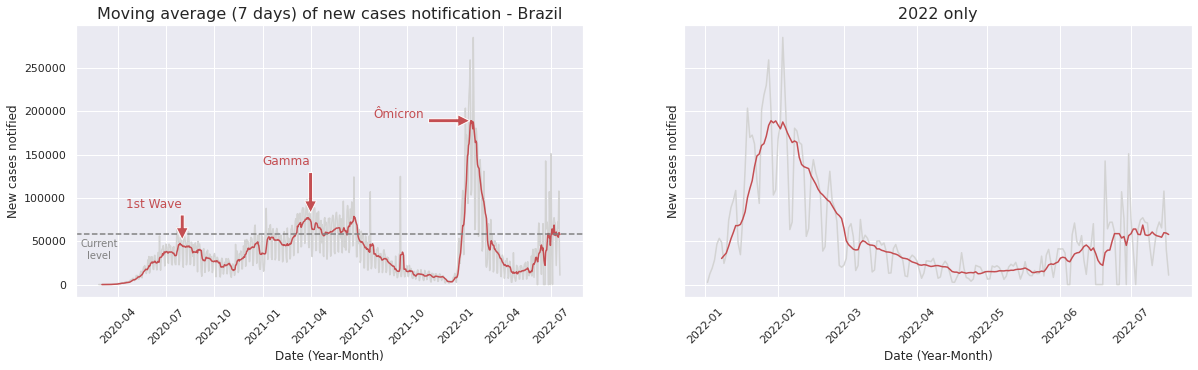

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

ufv_states = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
ufv_states.date = pd.to_datetime(ufv_states.date, format='%Y-%m-%d')
ufv2022 = ufv_states[ufv_states.date > '2022-1-1']

brasil = ufv_states.query('state == "TOTAL"').groupby('date').sum()
brasil2022 = ufv2022.query('state == "TOTAL"').groupby('date').sum()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=True)
ax1.plot(brasil.newCases, color='lightgray')
ax1.plot(brasil.newCases.rolling(7).mean(), color='r')
ax1.set_title('Moving average (7 days) of new cases notification - Brazil', fontsize=16)
ax1.set_ylabel('New cases notified')
ax1.set_xlabel('Date (Year-Month)')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(brasil.newCases.rolling(7).mean().iloc[-1], color ='gray', linestyle='--')
ax1.annotate('Ômicron', xy=(pd.to_datetime('2022-2'), brasil.newCases.rolling(7).mean().max()) ,  xycoords='data', 
            xytext=(pd.to_datetime('2021-11'), brasil.newCases.rolling(7).mean().max()), textcoords='data', color='r',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom',
            )
ax1.annotate('1st Wave', xy=(pd.to_datetime('2020-8'), 50000) ,  xycoords='data', 
            xytext=(pd.to_datetime('2020-8'), 100000), textcoords='data', color='r',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax1.annotate('Gamma', xy=(pd.to_datetime('2021-4'), 80000) ,  xycoords='data', 
            xytext=(pd.to_datetime('2021-4'), 150000), textcoords='data', color='r',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax1.annotate('Current\nlevel', xy=(ufv_states.date.iloc[0], brasil.newCases.rolling(7).mean().iloc[-1]-5000) ,  xycoords='data', 
            #xytext=(pd.to_datetime('2021-'), 150000), textcoords='data', color='r',
            horizontalalignment='center', verticalalignment='top', color='gray', fontsize=10
            )

ax2.plot(brasil2022.newCases, color='lightgray')
ax2.plot(brasil2022.newCases.rolling(7).mean(), color='r')
ax2.set_title('2022 only', fontsize=16)
ax2.set_ylabel('New cases notified')
ax2.set_xlabel('Date (Year-Month)')
ax2.tick_params(rotation=45)

ax2 = ax2

You can see what could be the beginning of a drop in the number of cases or at least a stabilization.

The amount is low compared to the cases of the beginning of the year (Ômicron). However, at the beginning of July, the number of new cases was equivalent to the rates we had at the worst moment of 2021, with the wave caused by the Gamma variant.

On today's date, we have a higher level than the worst moment of 2020.

> But is the current level accurate?

To answer this, we can consider the number of tests performed. After all, cases are only confirmed if they are tested, right?

***

**Source:** [Epidemiological Bulletin No. 118- COE Coronavirus Bulletin](https://www.gov.br/saude/pt-br/centrais-de-conteudo/publicacoes/boletins/boletins-epidemiologicos/covid-19 /2022/boletim-epidemiologico-no-118-boletim-coe-coronavirus.pdf/view) - Page 74

**Data from GAL (Laboratory Environment Manager) - 2022** (data not available in .csv format, so I manually input it to generate the graph.)

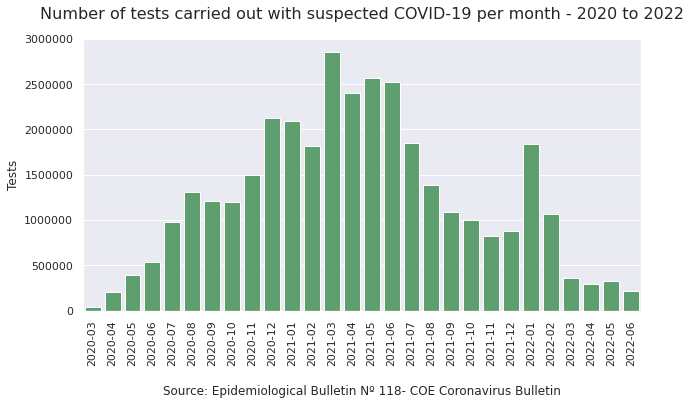

In [15]:
gal_data = [35703, 200987, 392396, 539321, 978909, 1304995, 1204862, 
            1196056, 1501346, 2127809, 2092625, 1819095, 2857883, 2398909, 
            2566896, 2526071, 1847511, 1383967, 1088724, 994522, 828174,
            879327, 1833777, 1062048, 364262, 292720, 321034, 218269]

gal_label = ['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01','2021-02','2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01','2022-02','2022-03', '2022-04', '2022-05', '2022-06']

gal = pd.DataFrame(gal_data, index=gal_label, columns=['Testes'])

plt.figure(figsize=(10,5))
sns.barplot(data = gal, x=gal.index, y='Testes', color="g")
plt.xticks(rotation=90)
plt.title('Number of tests carried out with suspected COVID-19 per month - 2020 to 2022', fontsize=16, pad=20)
plt.ylabel('Tests')
plt.xlabel('\nSource: Epidemiological Bulletin Nº 118- COE Coronavirus Bulletin')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Here we see a curious fact: In the last four months, the number of tests carried out has been fewer than the levels of the whole year 2021 and equivalent to April 2020 (beginning of the pandemic, there were no tests available.)

**Analyzing together the number of tests and the number of new cases:**

Now, if we test little and still have many cases, by logic, if more tests were performed, the number of positive cases would be higher.

* Extrapolating a bunch of variables to a simple estimate;
* Considering that the proportion of positive cases for COVID-19 in the tests is 22.62% (proportion related to the last 15 days of [Epidemiological Bulletin Nº 118- COE Coronavirus Bulletin](https://www.gov.br/saude/pt -br/central-de-conteudo/publicacoes/boletins/boletins-epidemiologicos/covid-19/2022/boletim-epidemiologico-no-118-boletim-coe-coronavirus.pdf/view) - Page 77);
*Finally, assuming we were running the 2021 average amount of testing over the last four months (March to June 2022)

We would have around 330,000 new cases (ADDITIONAL to those in the first graph) per month, something around 10,000 new cases per day:

In [16]:
media_testes_2021 = np.mean(gal_data[10:22])

dif_testes_marco_2022 = media_testes_2021 - gal_data[24]
dif_testes_abril_2022 = media_testes_2021 - gal_data[25]
dif_testes_maio_2022 = media_testes_2021 - gal_data[26]
dif_testes_junho_2022 = media_testes_2021 - gal_data[27]

add_positivos_marco_2022 = round((dif_testes_marco_2022*0.2262))
add_positivos_abril_2022 = round((dif_testes_abril_2022*0.2262))
add_positivos_maio_2022= round((dif_testes_maio_2022*0.2262))
add_positivos_junho_2022 = round((dif_testes_junho_2022*0.2262))

print(f'Considering an average of {round(media_testes_2021)} tests for the months from March to June, we would have:\n ')
print(f'Additional new positive cases in March - 2022: {add_positivos_marco_2022}')
print(f'Additional new positive cases in April - 2022: {add_positivos_abril_2022}')
print(f'Additional new positive cases in May - 2022: {add_positivos_maio_2022}')
print(f'Additional new positive cases in June - 2022: {add_positivos_junho_2022}')
print(f'\nAverage of {round((add_positivos_marco_2022+add_positivos_abril_2022+add_positivos_maio_2022+add_positivos_junho_2022)/4)} new cases per month.')

Considering an average of 1773642 tests for the months from March to June, we would have:
 
Additional new positive cases in March - 2022: 318802
Additional new positive cases in April - 2022: 334985
Additional new positive cases in May - 2022: 328580
Additional new positive cases in June - 2022: 351825

Average of 333548 new cases per month.


But why so few tests are being done? This database doesn't give us much information about it, but I recommend you watch this video to get more information from an expert in the area [(click here)](https://youtu.be/C8SyK87_v2s) (pt-BR).

A few points that MAY explain this situation:

* Brazil maintains a policy of testing only in symptomatic cases;
*Cases in vaccinated people tend to have milder symptoms or be asymptomatic.
* With the availability of rapid tests in pharmacies, new positives may not seek the public service for notification or testing.

So, It brings us to question 2.

#2 - Are people dying less?

As seen, the number of cases remains high, but apparently, the number of deaths has decreased. Do the numbers confirm this?

In [17]:
brasil['letalidade_1'] = brasil['deaths']/brasil['totalCases']
brasil['letalidade_2'] = brasil['deaths']/brasil['totalCases']

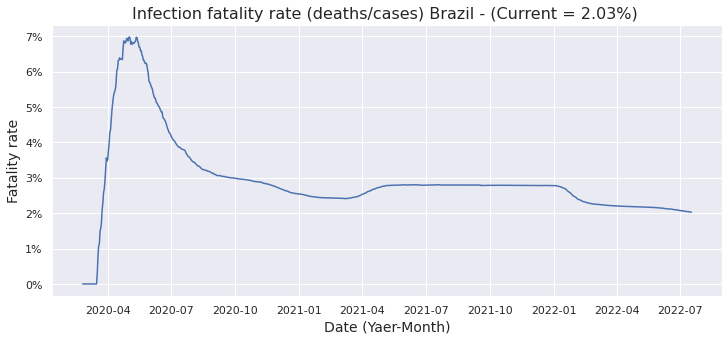

In [18]:
#Infection fatality rate (IFR)
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=brasil, x=brasil.index, y='letalidade_1')
ax.set_title(f'Infection fatality rate (deaths/cases) Brazil - (Current = {round(brasil.letalidade_1.iloc[-1]*100,2)}%) ', fontsize=16)
ax.set_ylabel('Fatality rate', fontsize=14)
ax.set_xlabel('Date (Yaer-Month)', fontsize=14)
ax.set_yticklabels([str(x)+'%' for x in range(-1,8)] )
ax=ax

The lethality rate from infection is a straightforward metric, which usually overestimates the real fatality rate because, as already seen, not all cases of covid are tested. Even so, it is possible to observe a downward trend, with the lowest rate since the pandemic's beginning.

To continue evaluating, we can see the graph of the number of new deaths daily since the beginning of the pandemic, shown below:

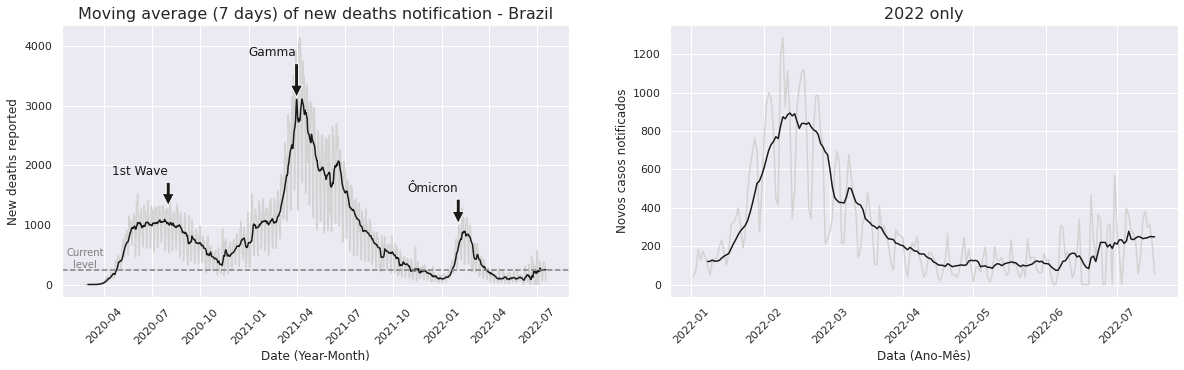

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=False)
ax1.plot(brasil.newDeaths, color='lightgray')
ax1.plot(brasil.newDeaths.rolling(7).mean(), color='k')
ax1.set_title('Moving average (7 days) of new deaths notification - Brazil', fontsize=16)
ax1.set_ylabel('New deaths reported')
ax1.set_xlabel('Date (Year-Month)')
ax1.tick_params(axis='x', rotation=45)

ax1.axhline(brasil.newDeaths.rolling(7).mean().iloc[-1], color ='gray', linestyle='--')
ax1.annotate('Ômicron', xy=(pd.to_datetime('2022-2'), 1000) ,  xycoords='data', 
            xytext=(pd.to_datetime('2022-2'), 1500), textcoords='data', color='k',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom',
            )
ax1.annotate('1st Wave', xy=(pd.to_datetime('2020-8'), 1300) ,  xycoords='data', 
            xytext=(pd.to_datetime('2020-8'), 2000), textcoords='data', color='k',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax1.annotate('Gamma', xy=(pd.to_datetime('2021-4'), brasil.newDeaths.rolling(7).mean().max()) ,  xycoords='data', 
            xytext=(pd.to_datetime('2021-4'), 4000), textcoords='data', color='k',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax1.annotate('Current\nlevel', xy=(ufv_states.date.iloc[0], brasil.newDeaths.rolling(7).mean().iloc[-1]) ,  xycoords='data', 
            #xytext=(pd.to_datetime('2021-'), 150000), textcoords='data', color='k',
            horizontalalignment='center', verticalalignment='bottom', color='gray', fontsize=10
            )

ax2.plot(brasil2022.newDeaths, color='lightgray')
ax2.plot(brasil2022.newDeaths.rolling(7).mean(), color='k')
ax2.set_title('2022 only', fontsize=16)
ax2.set_ylabel('Novos casos notificados')
ax2.set_xlabel('Data (Ano-Mês)')
ax2.tick_params(axis='x',rotation=45)

ax2 = ax2

Fortunately, the numbers confirm we have fewer cases of daily deaths than on any day in 2020 and 2021, except at the beginning of the pandemic. In January 2022, we reached the lowest death rates.

Although the numbers have grown again (surpassing the rate of 200 deaths per day on the 7-day moving average), the values remain unmatched by the terrible rates of 2021.

Compared to the rates of new confirmed cases, the gigantic spike in new confirmations caused by the Ômicron variant did indeed lead to an increase in the rate of daily deaths, but deaths remained lower than in 2020 and 2021.

> But what could have caused such a slowdown in the number of deaths?

Spoiler: Vaccines!

#3 - Are people vaccinated?

We have seen that the death rate has been falling since the second half of 2021, and the peak of new cases due to Ômicron did not reflect a proportional number of deaths.

> Could it be that the vaccines are the reason?

Yup.

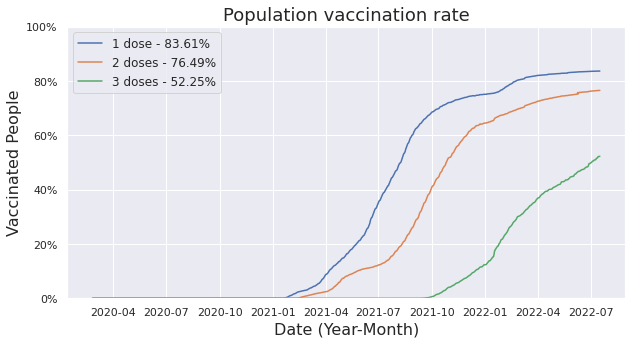

In [20]:
# Brazil's 2022 population - IBGE projection
# https://www.ibge.gov.br/apps/populacao/projecao/index.html
populacao = 214849734

vacina = ufv_states.query('state == "TOTAL"')[['date', 'vaccinated', 'vaccinated_second', 'vaccinated_third']]
vacina = vacina.groupby('date').sum()
vacina_perc = vacina/populacao

plt.figure(figsize=(10,5))
plt.plot(vacina_perc)
plt.ylim([0,1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], labels=[str(x)+'%' for x in range(0,120,20)])
plt.ylabel('Vaccinated People', fontsize=16)
plt.xlabel('Date (Year-Month)', fontsize=16)
plt.title('Population vaccination rate', fontsize=18,)
plt.legend([f'1 dose - {round(vacina_perc.vaccinated.iloc[-1]*100,2)}%', 
            f'2 doses - {round(vacina_perc.vaccinated_second.iloc[-1]*100,2)}%', 
            f'3 doses - {round(vacina_perc.vaccinated_third.iloc[-1]*100,2)}%'], fontsize=12)
plt.show()

As we can see, with the vaccination rate going up (especially concerning the second dose), mortality levels go down (second half of 2021).

Even with much misinformation about vaccines, the Brazilian population adhered relatively well to the immunization campaign, especially in 2021.

With the safety caused by vaccines, unfortunately, vaccination rates have slowed in 2022, and adherence to the third dose of the vaccine remains low among the population (52%).

But should we still be concerned if a large part of the population is vaccinated and if the death numbers are lower?

This brings us to the last question:

#4 - Who is most vulnerable right now?

So far, we have seen that in general:

* Cases are high (even testing significantly little);
* Deaths are low (but rising);
* 76% of the population has two doses of the vaccine, and only 52% have three doses.

> With the relative "security" we are experiencing, who is most vulnerable at this time of the pandemic?

The following chart shows the number of Severe Acute Respiratory Syndrome (SARS) notifications (which include COVID and other respiratory diseases) in 2022. In the graph, the number of notifications was divided by age group:

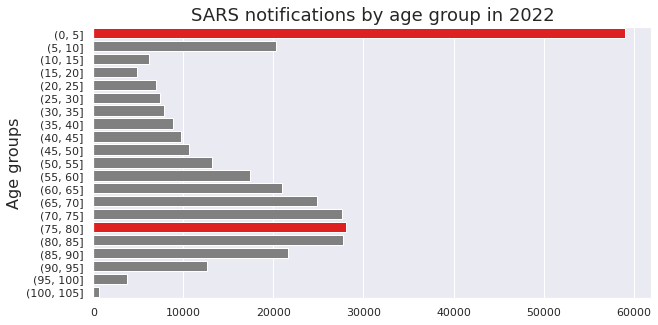

In [21]:
#https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022
# dictionary (pt-BR): https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/pdfs/dicionario_de_dados_srag_hosp_17_02_2022.pdf
# NU_IDADE_N - age
# SEM_NOT - epidemiological week of notification date

srag = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2022/INFLUD22-04-07-2022.csv',sep=';',low_memory=False)[['NU_IDADE_N', 'SEM_NOT']]

intervalos = pd.cut(srag['NU_IDADE_N'], bins=[x for x in range(0,110,5)])
srag['bins_5_em_5'] = pd.cut(srag['NU_IDADE_N'], bins=[x for x in range(0,110,5)])

srag_grupos_idade = srag.groupby('bins_5_em_5')[['SEM_NOT']].count()

plt.figure(figsize=(10,5))
pal = {interv: "red" if interv == pd.Interval(0,5) or interv == pd.Interval(75,80) else "gray" for interv in srag_grupos_idade.index}
ax = sns.barplot(data=srag_grupos_idade, y=srag_grupos_idade.index, x='SEM_NOT', orient='h', palette=pal)
plt.xticks(rotation=0)
ax.set_ylabel('Age groups',fontsize=16)
ax.set_xlabel('')
ax.set_title('SARS notifications by age group in 2022', fontsize=18)
plt.show()

As highlighted:

* the groups with the highest occurrence of SARS notifications are children from 0 to 5 years old and older adults from 76 to 80 years old.

* The range of 6 to 10 years is also quite representative, but it does not compare to the 0 to 5 years.

* From 60, the number of notifications starts to rise.

* From the age of 85 onwards, the value begins to decrease, possibly due to a population characteristic (there are more people aged 70 than 90, for example).

The following chart shows the status of New Severe Acute Respiratory Syndrome **(SARS) notifications per week in 2022**. The groups were divided into **vaccinal age groups** used in the Ministry of Health's immunization campaign:

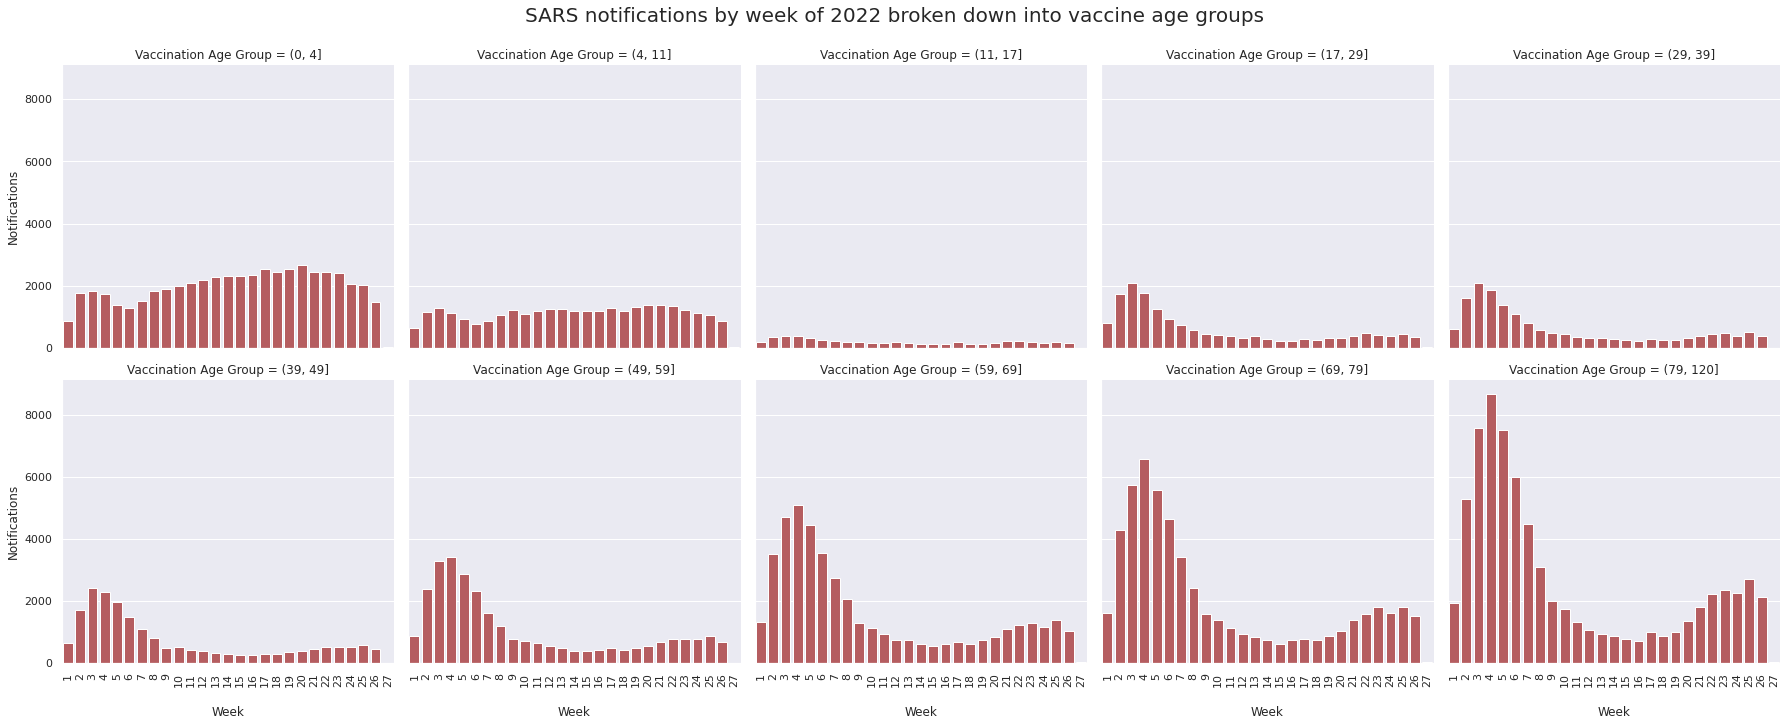

In [22]:
intervalos = pd.cut(srag['NU_IDADE_N'], bins=[0, 4, 11, 17, 29, 39, 49, 59, 69, 79, 120])
srag['Vaccination Age Group'] = pd.cut(srag['NU_IDADE_N'], bins=[0, 4, 11, 17, 29, 39, 49, 59, 69, 79, 120])

g = sns.catplot(data=srag, x='SEM_NOT', kind="count", col='Vaccination Age Group', col_wrap=5, color='r', orient='v')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('SARS notifications by week of 2022 broken down into vaccine age groups', fontsize=20)
g.set_axis_labels("\nWeek", "Notifications")
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)

Separately evaluating the evolution of each vaccine age group throughout 2022 concerning SARS notifications, we can show that:

* there is a peak of notifications at the beginning of the year related to Ômicron.
* throughout the year, SARS notifications in children aged 0 to 4 years have REMAINED high, around 2000 cases per week.
* in recent weeks (with the increase in covid cases), the increase in SARS notifications has impacted more people over 59 years old.

> In short, who is most vulnerable at this moment of the pandemic?
1. **Children from 0 to 4 years old** - The age group does not yet have a vaccine available.
2. **Elderly and immunosuppressed** - For having a lower immune response.

***

# Conclusion

Although we have greater security regarding the COVID-19 situation, the pandemic is unfortunately not over yet. We still have vulnerable age groups, which can suffer from the disease, and the number of new cases remains high.

This situation does not mean we will need a new lockdown or more severe restrictive measures. But the use of masks is an efficient and low-cost measure that we can all adhere to, at least in closed places. In addition, promoting ventilation in closed areas also contributes to reducing transmission.

> Stay safe! :)